In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline

physical_dev = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs avail: ", len(physical_dev))
tf.config.experimental.set_memory_growth(physical_dev[0], True)
#tf.debugging.set_log_device_placement(True)


#Data org
os.chdir('C:/venv/tensorflow-scripting/data/dogs-and-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/cat')
    os.makedirs('train/dog')
    os.makedirs('valid/cat')
    os.makedirs('valid/dog')
    os.makedirs('test/cat')
    os.makedirs('test/dog')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')        
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')
os.chdir('../../')


train_path = 'data/dogs-and-cats/train'
valid_path = 'data/dogs-and-cats/valid'
test_path = 'data/dogs-and-cats/test'

train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_path, target_size=(224,224), classes = ['cat', 'dog'], batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = valid_path, target_size=(224,224), classes = ['cat', 'dog'], batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = test_path, target_size=(224,224), classes = ['cat', 'dog'], batch_size = 10, shuffle = False)


assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

imgs, labels = next(train_batches)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
        
#plotImages(imgs)
#print(labels)

model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Flatten(),
    Dense(units = 2, activation = 'softmax'),
])
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = train_batches, validation_data = valid_batches, epochs = 10, verbose = 2)
#model.summary()



Num GPUs avail:  1
Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/10
100/100 - 5s - loss: 15.9104 - accuracy: 0.5760 - val_loss: 7.2511 - val_accuracy: 0.6100
Epoch 2/10
100/100 - 4s - loss: 2.6792 - accuracy: 0.7570 - val_loss: 4.3560 - val_accuracy: 0.6050
Epoch 3/10
100/100 - 4s - loss: 0.6401 - accuracy: 0.8950 - val_loss: 4.0118 - val_accuracy: 0.5950
Epoch 4/10
100/100 - 5s - loss: 0.2304 - accuracy: 0.9490 - val_loss: 2.8712 - val_accuracy: 0.6350
Epoch 5/10
100/100 - 5s - loss: 0.0644 - accuracy: 0.9840 - val_loss: 3.1810 - val_accuracy: 0.5950
Epoch 6/10
100/100 - 5s - loss: 0.0807 - accuracy: 0.9740 - val_loss: 2.9142 - val_accuracy: 0.6600
Epoch 7/10
100/100 - 4s - loss: 0.0157 - accuracy: 0.9940 - val_loss: 2.8417 - val_accuracy: 0.6450
Epoch 8/10
100/100 - 5s - loss: 9.8039e-04 - accuracy: 1.0000 - val_loss: 2.8965 - val_accuracy: 0.6150
Epoch 9/10
100/100 - 5s - loss: 3.8263e-04 - accurac

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

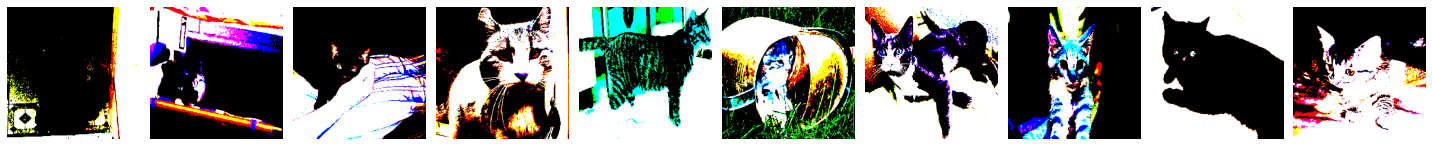

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Confusion matrix, without norm
[[25 25]
 [14 36]]


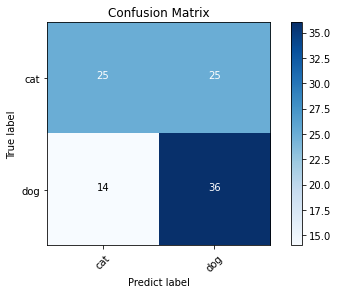

In [5]:
#PREDICT
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)


test_batches.classes

predictions = model.predict(x = test_batches, verbose = 0)
np.round(predictions)

cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Cunfusion matrix',
                          cmap = plt.cm.Blues):
    """
    Prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize  = True'.
    """
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without norm")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
            horizontalalignment = "center",
            color = "white" if cm[i,j] > thresh else "black")
            
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')

test_batches.class_indices

cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Confusion Matrix')



In [7]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
#vgg16_model.summary()

#Loop through every except last (vgg16 classifies 1000 classes. we need only 2) and add them to the new model
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    
#model.summary()

for layer in model.layers:
    layer.trainable = False

model.add(Dense(units = 2, activation = 'softmax'))

#model.summary()

model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(x = train_batches, validation_data = valid_batches, epochs = 5, verbose = 2)



Epoch 1/5
100/100 - 5s - loss: 0.1982 - accuracy: 0.9140 - val_loss: 0.1248 - val_accuracy: 0.9600
Epoch 2/5
100/100 - 5s - loss: 0.0699 - accuracy: 0.9740 - val_loss: 0.1055 - val_accuracy: 0.9650
Epoch 3/5
100/100 - 5s - loss: 0.0464 - accuracy: 0.9830 - val_loss: 0.1016 - val_accuracy: 0.9650
Epoch 4/5
100/100 - 5s - loss: 0.0332 - accuracy: 0.9910 - val_loss: 0.0965 - val_accuracy: 0.9700
Epoch 5/5
100/100 - 5s - loss: 0.0253 - accuracy: 0.9960 - val_loss: 0.0929 - val_accuracy: 0.9700


Confusion matrix, without norm
[[49  1]
 [ 1 49]]


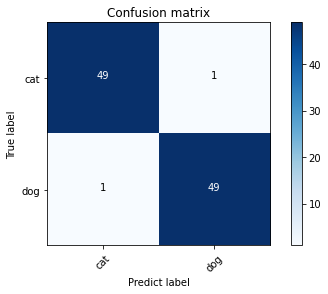

In [8]:
predictions = model.predict(x=test_batches, verbose = 0)
test_batches.classes
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))
test_batches.class_indices
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Confusion matrix')

FileNotFoundError: [Errno 2] No such file or directory: 'names.csv'